
#  Prescriptive Analytics  
## Module 9: Nonlinear Programming (NLP)

This notebook implements your Module 9 instructional content
 

# Convexity Test for Functions of a Single Variable

Suppose a function $$f(x)$$ has a second derivative for all possible values of $$x$$.  
Then we can classify its shape as follows:

- **Convex** if and only if  
$$
f''(x) \geq 0 \quad \text{for all } x
$$

- **Strictly convex** if and only if  
$$
f''(x) > 0 \quad \text{for all } x
$$

- **Concave** if and only if  
$$
f''(x) \leq 0 \quad \text{for all } x
$$

- **Strictly concave** if and only if  
$$
f''(x) < 0 \quad \text{for all } x
$$

---

## Examples of Functions

- **Strictly convex:** $$f(x) = x^2$$ since $$f''(x) = 2 > 0$$ everywhere.  
- **Concave:** $$f(x) = \sqrt{x}$$ (for $$x > 0$$) since $$f''(x) < 0$$.  
- **Strictly concave:** $$f(x) = -x^2$$ since $$f''(x) = -2 < 0$$.  
- **Both convex & concave:** any linear function, e.g. $$f(x) = 3x + 2$$, since $$f''(x) = 0$$.  
- **Neither convex nor concave:** $$f(x) = x^3$$, because $$f''(x) = 6x$$, which is sometimes positive and sometimes negative.

---

## Why This Matters in Optimization

- A **strictly convex** objective function has a **unique global minimum**.  
- A **strictly concave** objective function has a **unique global maximum**.  
- If a function is linear (both convex and concave), optimization reduces to checking the boundary of the feasible region.  
- Functions that are neither convex nor concave can have **multiple local minima or maxima**, making optimization much harder.

---

# Convex Sets

The concept of convex functions leads naturally to the concept of **convex sets**.

- A set is **convex** if, for any two points in the set, the **entire line segment** between them is also in the set.  

Graphically:  
- The region **above or on** the graph of a convex function is a convex set.  
- The region **below or on** the graph of a concave function is a convex set.  
- The **intersection** of convex sets is also convex.

This property is critical in optimization: feasible regions defined by convex sets ensure that local optima are global.


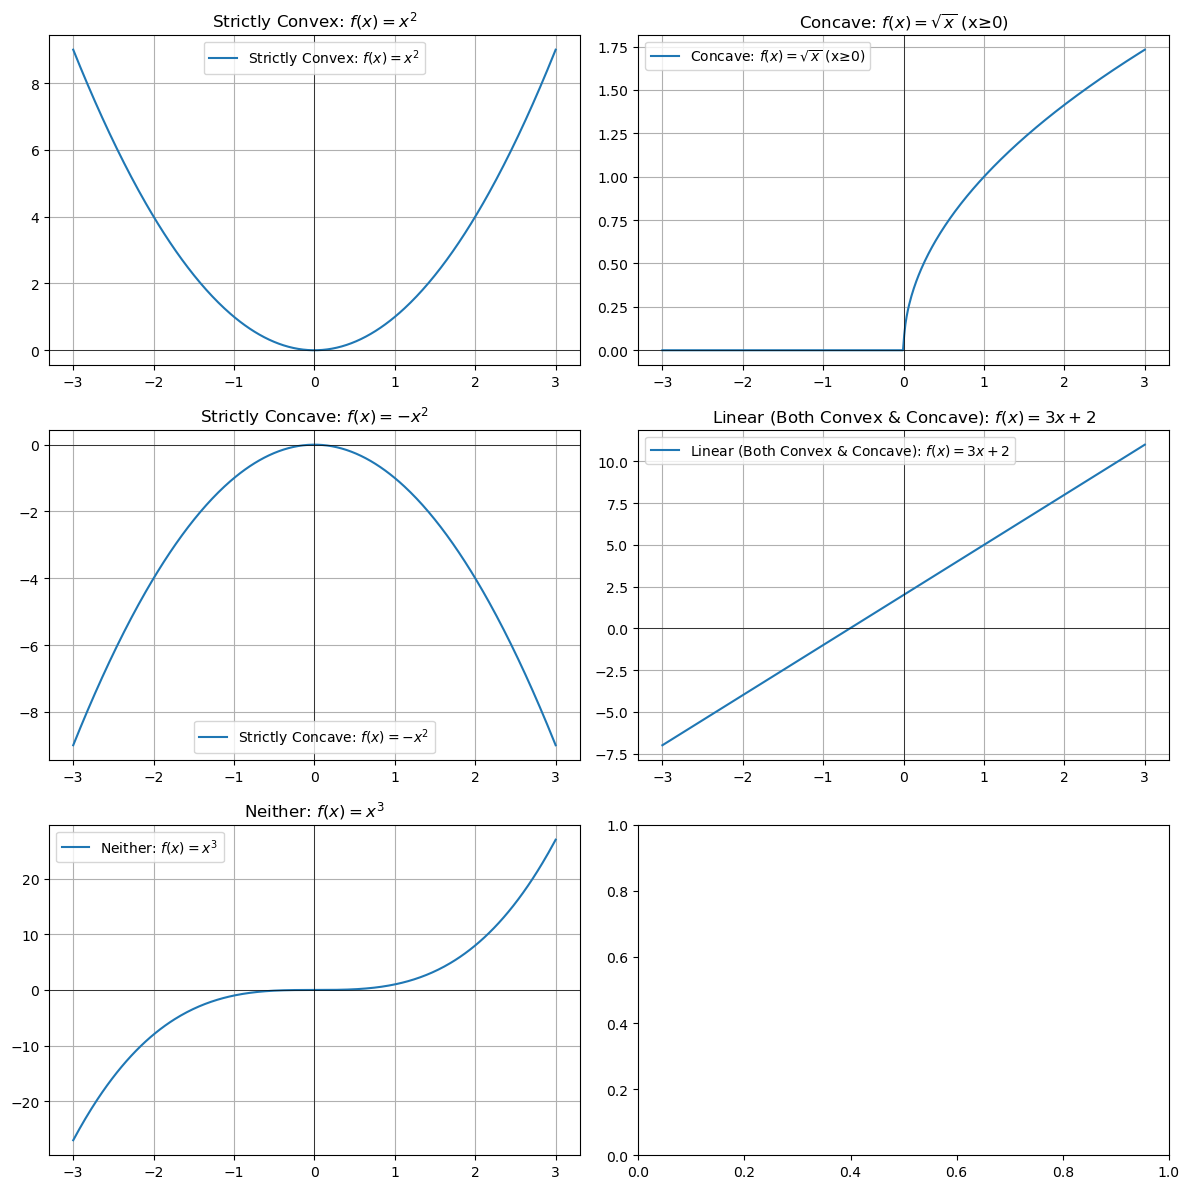

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 400)

functions = {
    "Strictly Convex: $f(x)=x^2$": x**2,
    "Concave: $f(x)=\\sqrt{x}$ (x≥0)": np.sqrt(np.clip(x,0,None)),
    "Strictly Concave: $f(x)=-x^2$": -x**2,
    "Linear (Both Convex & Concave): $f(x)=3x+2$": 3*x + 2,
    "Neither: $f(x)=x^3$": x**3
}

fig, axs = plt.subplots(3,2, figsize=(12,12))
axs = axs.ravel()

for ax, (title, y) in zip(axs, functions.items()):
    ax.plot(x, y, label=title)
    ax.set_title(title)
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


## Visualizing Convexity and Concavity with Two Points

To understand convexity/concavity:

1. Pick two points on the graph, say  
   $$A = (x', f(x')) \quad \text{and} \quad B = (x'', f(x'')),$$
   where $$x' < x''.$$

2. Draw the line segment between them:
   $$
   \big(\lambda x'' + (1-\lambda)x', \; \lambda f(x'') + (1-\lambda) f(x')\big),
   \quad 0 < \lambda < 1.
   $$

3. Compare the curve $$f(x)$$ against this line segment:  
   - If the curve lies **below or on** the line, $$f(x)$$ is **convex**.  
   - If the curve lies **above or on** the line, $$f(x)$$ is **concave**.  
   - If it coincides (linear), it is both convex and concave.  
   - If it crosses, it is neither.


ValueError: operands could not be broadcast together with shapes (400,) (100,) 

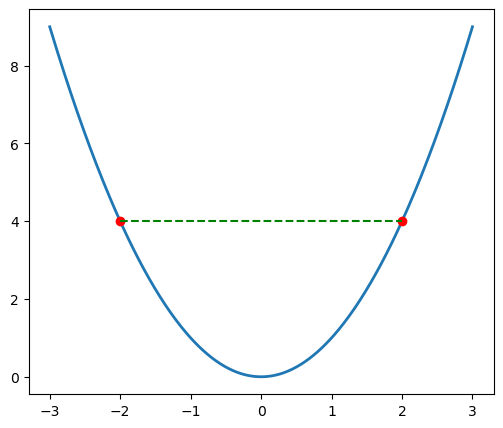

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f_convex(x): return x**2

x = np.linspace(-3, 3, 400)
y = f_convex(x)

# Pick two points
x1, x2 = -2, 2
y1, y2 = f_convex(x1), f_convex(x2)

# Line segment between points
lambdas = np.linspace(0,1,100)
x_line = lambdas*x2 + (1-lambdas)*x1
y_line = lambdas*y2 + (1-lambdas)*y1

plt.figure(figsize=(6,5))
plt.plot(x, y, label=r"$f(x) = x^2$ (Convex)", linewidth=2)
plt.plot([x1, x2],[y1,y2],'ro',label="Points A,B")
plt.plot(x_line,y_line,'g--',label="Line Segment AB")
plt.fill_between(x_line, y, y_line, where=(y <= y_line), color="lightgreen", alpha=0.3)

plt.title("Convex Function: f(x)=x²")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True)
plt.show()


For $$f(x)=x^2$$:

- Two points: $$A=(-2,4), \; B=(2,4)$$.  
- The line segment between them lies **above** the curve.  
- Therefore, $$f(x)$$ is **convex**.  
- Second derivative test confirms: $$f''(x)=2 > 0$$ everywhere.


ValueError: operands could not be broadcast together with shapes (400,) (100,) 

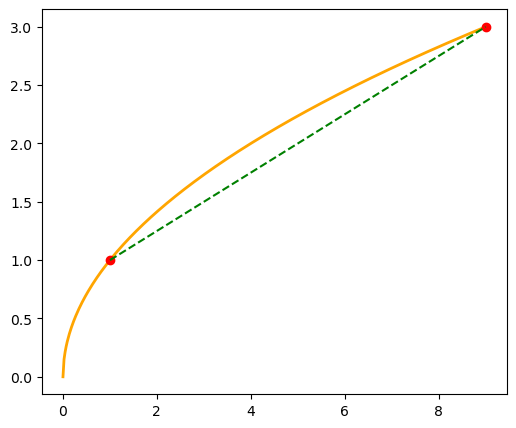

In [ ]:
def f_concave(x): return np.sqrt(x)

x = np.linspace(0, 9, 400)
y = f_concave(x)

# Pick two points
x1, x2 = 1, 9
y1, y2 = f_concave(x1), f_concave(x2)

# Line segment
lambdas = np.linspace(0,1,100)
x_line = lambdas*x2 + (1-lambdas)*x1
y_line = lambdas*y2 + (1-lambdas)*y1

plt.figure(figsize=(6,5))
plt.plot(x, y, color="orange", label=r"$f(x) = \sqrt{x}$ (Concave)", linewidth=2)
plt.plot([x1, x2],[y1,y2],'ro',label="Points A,B")
plt.plot(x_line,y_line,'g--',label="Line Segment AB")
plt.fill_between(x_line, y_line, y, where=(y <= y_line), color="orange", alpha=0.2)

plt.title("Concave Function: f(x)=√x")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True)
plt.show()


For $$f(x)=\sqrt{x}$$:

- Two points: $$A=(1,1), \; B=(9,3)$$.  
- The line segment between them lies **below** the curve.  
- Therefore, $$f(x)$$ is **concave**.  
- Second derivative test: $$f''(x) = -\tfrac{1}{4x^{3/2}} < 0$$ for $$x > 0$$.


## Case 1: Strictly Convex Function

Let’s consider:

$$
f(x) = x^2
$$

**Step 1. First derivative (slope):**

$$
f'(x) = \frac{d}{dx}(x^2) = 2x
$$

**Step 2. Second derivative (curvature):**

$$
f''(x) = \frac{d}{dx}(2x) = 2
$$

Since $$f''(x) = 2 > 0$$ everywhere, the function is **strictly convex**.

**Interpretation:**  
- The slope is always increasing.  
- The curve is “bowl-shaped,” bending upward everywhere.  
- Any line segment between two points lies **above the curve**.


ValueError: operands could not be broadcast together with shapes (400,) (100,) 

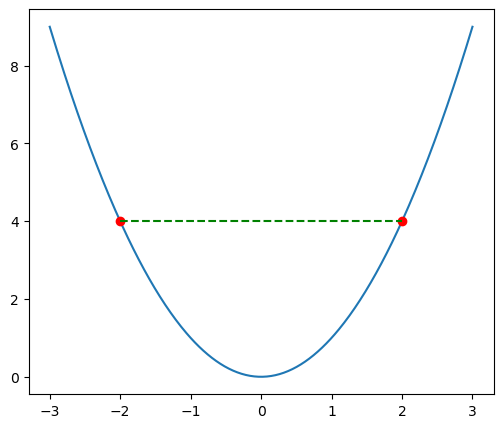

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): return x**2

x = np.linspace(-3,3,400)
y = f(x)

x1, x2 = -2, 2
y1, y2 = f(x1), f(x2)
lambdas = np.linspace(0,1,100)
x_line = lambdas*x2 + (1-lambdas)*x1
y_line = lambdas*y2 + (1-lambdas)*y1

plt.figure(figsize=(6,5))
plt.plot(x,y,label=r"$f(x)=x^2$")
plt.plot([x1,x2],[y1,y2],'ro',label="Points A,B")
plt.plot(x_line,y_line,'g--',label="Line Segment AB")
plt.fill_between(x_line,y, y_line, where=(y <= y_line), color="lightgreen", alpha=0.3)
plt.title("Strictly Convex Function")
plt.legend(); plt.grid(True); plt.show()


## Case 2: Concave Function

Consider:

$$
f(x) = \sqrt{x}, \quad x \ge 0
$$

**Step 1. First derivative:**

$$
f'(x) = \frac{1}{2\sqrt{x}}
$$

**Step 2. Second derivative:**

$$
f''(x) = -\frac{1}{4x^{3/2}}
$$

For all $$x > 0, \ f''(x) < 0$$, so the function is **concave**.

**Interpretation:**  
- The slope decreases as $$x$$ grows.  
- The curve is “cap-shaped,” bending downward.  
- Any line segment lies **below the curve**.


ValueError: operands could not be broadcast together with shapes (400,) (100,) 

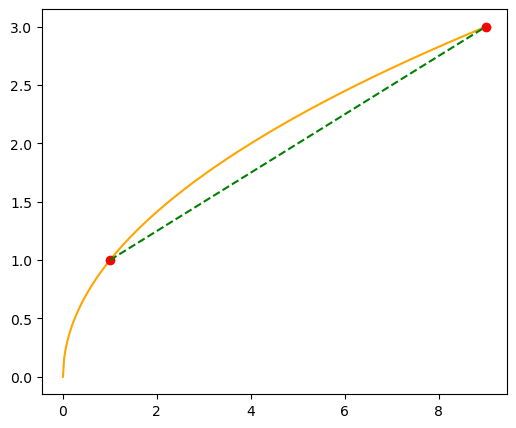

In [ ]:
def f(x): return np.sqrt(x)

x = np.linspace(0,9,400)
y = f(x)

x1, x2 = 1, 9
y1, y2 = f(x1), f(x2)
lambdas = np.linspace(0,1,100)
x_line = lambdas*x2 + (1-lambdas)*x1
y_line = lambdas*y2 + (1-lambdas)*y1

plt.figure(figsize=(6,5))
plt.plot(x,y,color="orange",label=r"$f(x)=\sqrt{x}$")
plt.plot([x1,x2],[y1,y2],'ro',label="Points A,B")
plt.plot(x_line,y_line,'g--',label="Line Segment AB")
plt.fill_between(x_line,y_line,y, where=(y <= y_line), color="orange", alpha=0.2)
plt.title("Concave Function")
plt.legend(); plt.grid(True); plt.show()


## Case 3: Strictly Concave Function

Take:

$$
f(x) = -x^2
$$

**Step 1. First derivative:**

$$
f'(x) = \frac{d}{dx}(-x^2) = -2x
$$

**Step 2. Second derivative:**

$$
f''(x) = \frac{d}{dx}(-2x) = -2
$$

Since $$f''(x) = -2 < 0$$ everywhere, the function is **strictly concave**.

**Interpretation:**  
- The slope is always decreasing.  
- The curve bends downward everywhere.  
- Any line segment lies **below the curve**.


ValueError: operands could not be broadcast together with shapes (400,) (100,) 

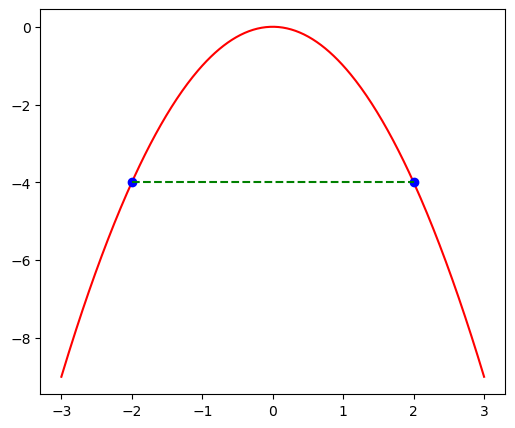

In [ ]:
def f(x): return -x**2

x = np.linspace(-3,3,400)
y = f(x)

x1, x2 = -2, 2
y1, y2 = f(x1), f(x2)
lambdas = np.linspace(0,1,100)
x_line = lambdas*x2 + (1-lambdas)*x1
y_line = lambdas*y2 + (1-lambdas)*y1

plt.figure(figsize=(6,5))
plt.plot(x,y,color="red",label=r"$f(x)=-x^2$")
plt.plot([x1,x2],[y1,y2],'bo',label="Points A,B")
plt.plot(x_line,y_line,'g--',label="Line Segment AB")
plt.fill_between(x_line,y_line,y, where=(y <= y_line), color="salmon", alpha=0.3)
plt.title("Strictly Concave Function")
plt.legend(); plt.grid(True); plt.show()


## Case 4: Both Convex & Concave (Linear Function)

Consider:

$$
f(x) = 3x + 2
$$

**Step 1. First derivative:**

$$
f'(x) = 3
$$

**Step 2. Second derivative:**

$$
f''(x) = 0
$$

Since the second derivative is **zero everywhere**, the function is **both convex and concave**.

**Interpretation:**  
- A straight line neither bends up nor down.  
- The line segment between any two points is exactly on the graph.


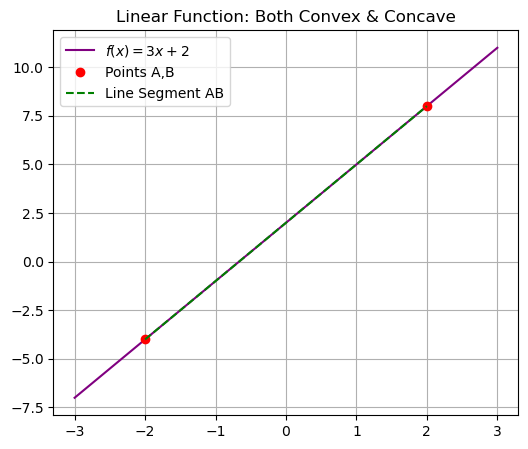

In [ ]:
def f(x): return 3*x + 2

x = np.linspace(-3,3,400)
y = f(x)

x1, x2 = -2, 2
y1, y2 = f(x1), f(x2)

plt.figure(figsize=(6,5))
plt.plot(x,y,color="purple",label=r"$f(x)=3x+2$")
plt.plot([x1,x2],[y1,y2],'ro',label="Points A,B")
plt.plot([x1,x2],[y1,y2],'g--',label="Line Segment AB")
plt.title("Linear Function: Both Convex & Concave")
plt.legend(); plt.grid(True); plt.show()


## Case 5: Neither Convex nor Concave

Finally:

$$
f(x) = x^3
$$

**Step 1. First derivative:**

$$
f'(x) = 3x^2
$$

**Step 2. Second derivative:**

$$
f''(x) = 6x
$$

- For $$x > 0, f''(x) > 0 \ \Rightarrow$$ convex.  
- For $$x < 0, f''(x) < 0 \ \Rightarrow$$ concave.  

Therefore, the function is **neither convex nor concave overall**.

**Interpretation:**  
- The curve bends downward on the left side, upward on the right.  
- The function changes curvature at $$x=0$$ (inflection point).  
- Line segments may cross the curve depending on which region you pick.


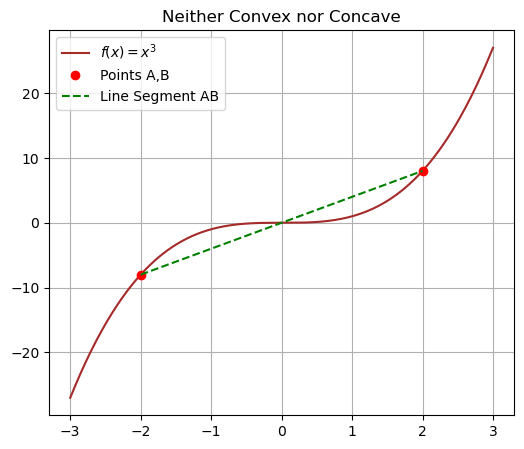

In [ ]:
def f(x): return x**3

x = np.linspace(-3,3,400)
y = f(x)

x1, x2 = -2, 2
y1, y2 = f(x1), f(x2)
lambdas = np.linspace(0,1,100)
x_line = lambdas*x2 + (1-lambdas)*x1
y_line = lambdas*y2 + (1-lambdas)*y1

plt.figure(figsize=(6,5))
plt.plot(x,y,color="brown",label=r"$f(x)=x^3$")
plt.plot([x1,x2],[y1,y2],'ro',label="Points A,B")
plt.plot(x_line,y_line,'g--',label="Line Segment AB")
plt.title("Neither Convex nor Concave")
plt.legend(); plt.grid(True); plt.show()


## Exercise: Convexity Check with the Second Derivative Test

Consider the function

$$
f(x) = x^4
$$

**Task:**
1. Compute the **first derivative** \(f'(x)\).  
2. Compute the **second derivative** \(f''(x)\).  
3. Use the second derivative test to determine whether \(f(x)\) is convex, concave, both, or neither.  
4. Sketch the shape or visualize it to check your reasoning.  

✍️ *Work this out by hand before scrolling down to the answer sheet.*


## Answer Sheet

**Step 1. First derivative:**

$$
f'(x) = \frac{d}{dx}(x^4) = 4x^3
$$

**Step 2. Second derivative:**

$$
f''(x) = \frac{d}{dx}(4x^3) = 12x^2
$$

**Step 3. Apply second derivative test:**

- For all real numbers \(x\):

$$
f''(x) = 12x^2 \ge 0
$$

- At \(x=0\):

$$
f''(0) = 0
$$

- For all other values of \(x\):

$$
f''(x) > 0
$$

Therefore, the function is **convex everywhere** and **strictly convex** except at the single point \(x=0\).

**Step 4. Interpretation:**

- The graph is bowl-shaped, curving upward everywhere.  
- Any line segment between two points lies above the curve.  
- In optimization, this means any local minimum is also the **global minimum** (in fact, at \(x=0\), the function attains its unique minimum value of 0).


ValueError: operands could not be broadcast together with shapes (400,) (100,) 

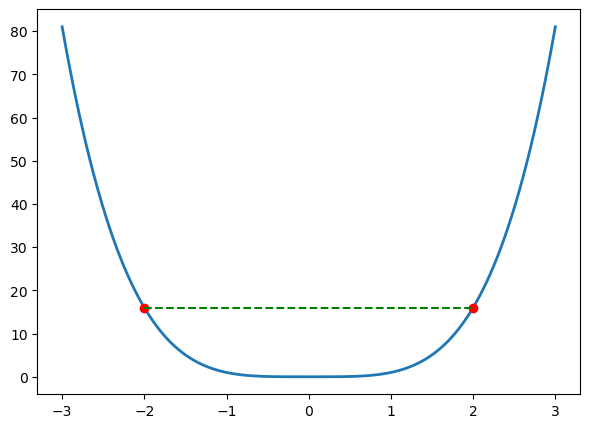

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
def f(x): return x**4

# Plot range
x = np.linspace(-3, 3, 400)
y = f(x)

# Pick two points
x1, x2 = -2, 2
y1, y2 = f(x1), f(x2)

# Line segment between them
lambdas = np.linspace(0,1,100)
x_line = lambdas*x2 + (1-lambdas)*x1
y_line = lambdas*y2 + (1-lambdas)*y1

# Plot
plt.figure(figsize=(7,5))
plt.plot(x, y, label=r"$f(x) = x^4$", linewidth=2)
plt.plot([x1, x2], [y1, y2], 'ro', label="Points A & B")
plt.plot(x_line, y_line, 'g--', label="Line Segment AB")
plt.fill_between(x_line, y, y_line, where=(y <= y_line), color="lightgreen", alpha=0.3)

plt.title("Visualization of Convexity for f(x) = x^4")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


## Exercise: A Function with Changing Curvature

Consider
$$
f(x) = x^4 - x^2.
$$

**Tasks**
1. Compute the **first derivative** \(f'(x)\).
2. Compute the **second derivative** \(f''(x)\).
3. Use the **second derivative test** to determine where \(f\) is convex, concave, or neither overall.
4. Identify the **inflection points** (where curvature changes).

Work it out by hand before checking the answer sheet.


## Answer Sheet

**Step 1. First derivative**

$$
f'(x) = \frac{d}{dx}\big(x^4 - x^2\big) = 4x^3 - 2x.
$$

**Step 2. Second derivative**

$$
f''(x) = \frac{d}{dx}\big(4x^3 - 2x\big) = 12x^2 - 2.
$$

**Step 3. Second derivative test (by regions)**

Solve \(f''(x) = 0\):

$$
12x^2 - 2 = 0 \;\;\Longrightarrow\;\; x^2 = \tfrac{1}{6} \;\;\Longrightarrow\;\; x = \pm \tfrac{1}{\sqrt{6}}.
$$

- For values where:

$$
|x| > \tfrac{1}{\sqrt{6}}
$$

then

$$
f''(x) = 12x^2 - 2 > 0 \quad \Longrightarrow \quad \text{Convex region.}
$$

- For values where:

$$
|x| < \tfrac{1}{\sqrt{6}}
$$

then

$$
f''(x) = 12x^2 - 2 < 0 \quad \Longrightarrow \quad \text{Concave region.}
$$

**Step 4. Inflection points**

Curvature changes at

$$
x = -\frac{1}{\sqrt{6}}, \qquad x = \frac{1}{\sqrt{6}}.
$$

These are **inflection points** (the second derivative changes sign there).


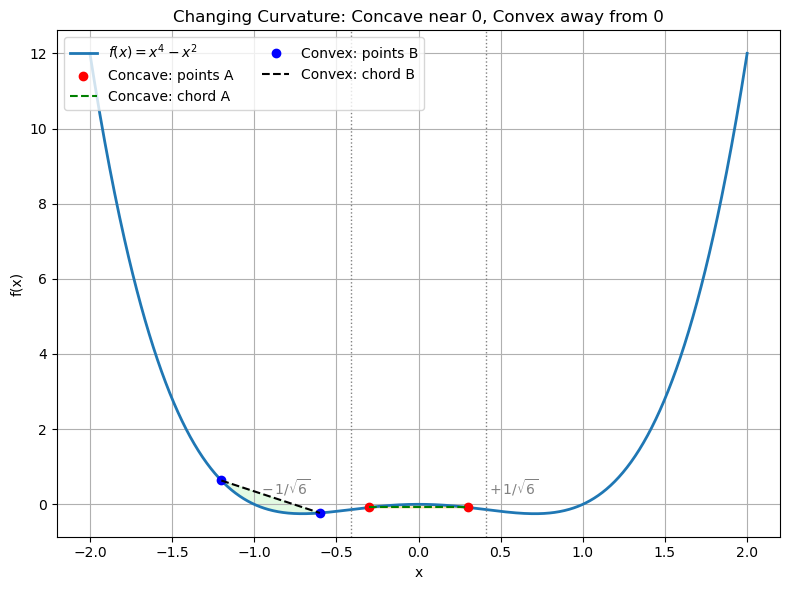

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): 
    return x**4 - x**2

# Domain and curve
x = np.linspace(-2, 2, 800)
y = f(x)

# Region thresholds
x_thr = 1/np.sqrt(6)

# Pair A (concave region): pick points inside (-x_thr, x_thr)
xa1, xa2 = -0.3, 0.3
ya1, ya2 = f(xa1), f(xa2)
lam = np.linspace(0,1,100)
xa_line = lam*xa2 + (1-lam)*xa1
ya_line = lam*ya2 + (1-lam)*ya1

# Pair B (convex region): pick points outside thresholds
xb1, xb2 = -1.2, -0.6
yb1, yb2 = f(xb1), f(xb2)
xb_line = lam*xb2 + (1-lam)*xb1
yb_line = lam*yb2 + (1-lam)*yb1

plt.figure(figsize=(8,6))
plt.plot(x, y, label=r"$f(x)=x^4 - x^2$", linewidth=2)

# Concave-region chord (curve above chord)
plt.plot([xa1, xa2], [ya1, ya2], 'ro', label="Concave: points A")
plt.plot(xa_line, ya_line, 'g--', label="Concave: chord A")
# shade where curve is above the chord (concavity)
y_curve_a = f(xa_line)
plt.fill_between(xa_line, ya_line, y_curve_a, where=(y_curve_a >= ya_line), 
                 color="orange", alpha=0.25)

# Convex-region chord (curve below chord)
plt.plot([xb1, xb2], [yb1, yb2], 'bo', label="Convex: points B")
plt.plot(xb_line, yb_line, 'k--', label="Convex: chord B")
# shade where curve is below the chord (convexity)
y_curve_b = f(xb_line)
plt.fill_between(xb_line, y_curve_b, yb_line, where=(y_curve_b <= yb_line),
                 color="lightgreen", alpha=0.25)

# Mark inflection points
plt.axvline(+x_thr, color="gray", linestyle=":", linewidth=1)
plt.axvline(-x_thr, color="gray", linestyle=":", linewidth=1)
plt.text(+x_thr+0.02, min(y)+0.5, r"$+\,1/\sqrt{6}$", color="gray")
plt.text(-x_thr-0.55, min(y)+0.5, r"$-\,1/\sqrt{6}$", color="gray")

plt.title("Changing Curvature: Concave near 0, Convex away from 0")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(loc="upper left", ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


# Unconstrained Optimization of a Function of a Single Variable

Unconstrained optimization means finding the **maximum or minimum** of a function
$$
f(x), \quad x \in \mathbb{R}
$$
with **no restrictions** on the values of \(x\).

---

## Necessary and Sufficient Conditions for Optimality

### First-order necessary condition
At an optimal point $ x^* $, the slope must vanish:
$$
f'(x^*) = 0
$$

This condition finds **stationary points**, which may be:
- Local minima
- Local maxima
- Saddle points (flat but not optimal)

### Second-order condition
To classify the stationary point:
- If \(f''(x^*) > 0 \) → local minimum (curve bends upward).
- If \(f''(x^*) < 0 \) → local maximum (curve bends downward).
- If \(f''(x^*) = 0 \) → inconclusive (need higher-order derivatives).

---

## Methods for Finding Optima

1. **Analytical**: Solve \(f'(x)=0\) algebraically.
2. **Graphical**: Plot the function and observe optima.
3. **Numerical**:
   - **Bisection method**: Slow but guaranteed if the interval is known.
   - **Newton’s method**:
     $$
     x_{new} = x_{old} - \frac{f'(x_{old})}{f''(x_{old})}
     $$
     Fast convergence but requires first and second derivatives.
   - **Secant method**: Like Newton’s method but uses an approximation to the derivative.

---

## Global vs. Local Optima

- **Local optimum**: Best solution only in a neighborhood of \(x^*\).
- **Global optimum**: Best solution over the entire domain.

For **non-convex functions**, multiple local optima may exist.

---

## Special Cases

- **Strictly convex function**: Any local minimum is also the **global minimum**.
- **Strictly concave function**: Any local maximum is also the **global maximum**.
- **Unimodal function**: Has exactly one optimum (either max or min).


## Example: $ f(x) = x^3 - 3x + 1 $

1. First derivative:
$$
f'(x) = 3x^2 - 3
$$
Solve \(f'(x)=0\):
$$
3x^2 - 3 = 0 \quad \Longrightarrow \quad x = \pm 1.
$$

2. Second derivative:
$$
f''(x) = 6x
$$

- At \(x=-1\): \(f''(-1) = -6 < 0\) → local **maximum**.
- At \(x=1\): \(f''(1) = 6 > 0\) → local **minimum**.

Thus, \(f(x)\) has a local max at \((-1, f(-1))\) and a local min at \((1, f(1))\).


In [24]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbol and function
x = sp.symbols('x')
f = x**3 - 3*x + 1

# First and second derivatives
f_prime = sp.diff(f, x)
f_double = sp.diff(f_prime, x)

# Solve f'(x)=0
critical_points = sp.solve(sp.Eq(f_prime,0), x)

critical_points


[-1, 1]

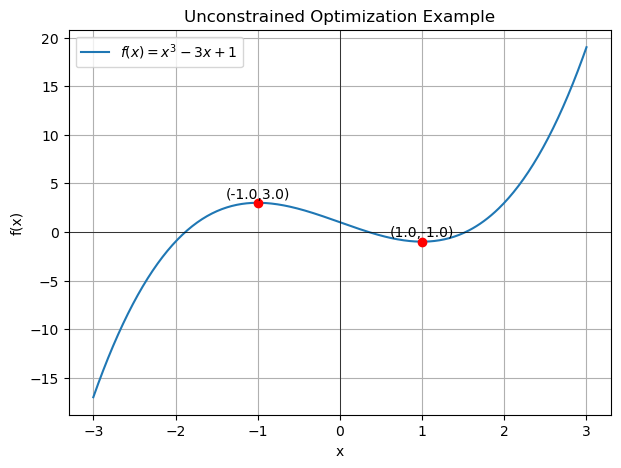

In [25]:
f_func = sp.lambdify(x, f, 'numpy')

X = np.linspace(-3,3,400)
Y = f_func(X)

cp_vals = [(float(c), float(f_func(c))) for c in critical_points]

plt.figure(figsize=(7,5))
plt.plot(X, Y, label=r"$f(x)=x^3 - 3x + 1$")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

# mark critical points
for cx, cy in cp_vals:
    plt.plot(cx, cy, 'ro')
    plt.text(cx, cy+0.5, f"({cx:.1f},{cy:.1f})", ha="center")

plt.title("Unconstrained Optimization Example")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True); plt.show()


## Newton’s Method for Unconstrained Optimization

Newton’s method iteratively updates a guess  $x_{k} $ using:

$$
x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}.
$$

- The method uses both the **first derivative** (slope) and the **second derivative** (curvature).  
- It converges quickly near a solution, but requires $f''(x)\neq 0$.  
 


In [26]:
import sympy as sp

# Define function and derivatives
x = sp.symbols('x')
f = x**3 - 3*x + 1
f_prime = sp.diff(f, x)
f_double = sp.diff(f_prime, x)

f_prime_func = sp.lambdify(x, f_prime, 'numpy')
f_double_func = sp.lambdify(x, f_double, 'numpy')

def newton_method(f_prime, f_double, x0, tol=1e-6, max_iter=20):
    x_curr = x0
    history = [x_curr]
    for _ in range(max_iter):
        f1 = f_prime(x_curr)
        f2 = f_double(x_curr)
        if abs(f2) < 1e-8:  # avoid division by zero
            break
        x_next = x_curr - f1/f2
        history.append(x_next)
        if abs(x_next - x_curr) < tol:
            break
        x_curr = x_next
    return x_curr, history

# Try different starting points
roots = {}
for start in [-2.5, -0.5, 2.0]:
    opt, path = newton_method(f_prime_func, f_double_func, start)
    roots[start] = (opt, path)

roots


{-2.5: (-1.0000000000033555,
  [-2.5,
   -1.45,
   -1.0698275862068964,
   -1.0022788213065104,
   -1.0000025906097367,
   -1.0000000000033555,
   -1.0]),
 -0.5: (-1.0000000464611474,
  [-0.5,
   -1.25,
   -1.025,
   -1.0003048780487804,
   -1.0000000464611474,
   -1.000000000000001]),
 2.0: (1.0000000464611474,
  [2.0,
   1.25,
   1.025,
   1.0003048780487804,
   1.0000000464611474,
   1.000000000000001])}

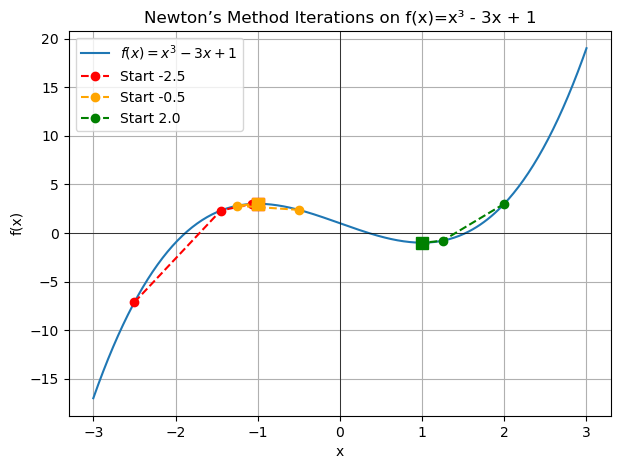

In [27]:
import numpy as np
import matplotlib.pyplot as plt

f_func = sp.lambdify(x, f, 'numpy')

X = np.linspace(-3,3,400)
Y = f_func(X)

plt.figure(figsize=(7,5))
plt.plot(X, Y, label=r"$f(x)=x^3 - 3x + 1$")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

colors = { -2.5:"red", -0.5:"orange", 2.0:"green" }

for start, (opt, path) in roots.items():
    y_path = [f_func(px) for px in path]
    plt.plot(path, y_path, 'o--', color=colors[start], label=f"Start {start}")
    plt.plot(opt, f_func(opt), 's', color=colors[start], markersize=8)

plt.title("Newton’s Method Iterations on f(x)=x³ - 3x + 1")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True); plt.show()
